In [77]:
from sklearn.datasets import load_iris
import os
iris = load_iris()
X=iris['data'][:,2:]
y=iris['target']

In [78]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

In [83]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file=image_path('iris_tree.dot'),
               feature_names=iris.feature_names[2:],
            class_names=iris.target_names,
            rounded=True,
            filled=True)

In [88]:
image_path('iris_tree.dot')

'./images/decision_trees/iris_tree.dot'

In [89]:
!dot -T png ./images/decision_trees/iris_tree.dot -o ./images/decision_trees/iris_tree.png

In [90]:
ls

DecisionTree.ipynb  images/             iris_tree.dot       iris_tree.png


In [91]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [96]:
from matplotlib.colors import ListedColormap

In [101]:
def plot_decision_tree_boundaries(model, X, y):
    x0s = np.linspace(X[:,0].min(), X[:,0].max())
    x1s = np.linspace(X[:,1].min(), X[:,1].max())
    x0,x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_new = model.predict(X_new).reshape(x0.shape)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contourf(x0, x1, y_new, cmap= custom_cmap2)
    setosa = X[y==0]
    versicolor = X[y==1]
    virginica = X[y==2]
    plt.plot(setosa[:,0], setosa[:,1], 'y^')
    plt.plot(versicolor[:,0], versicolor[:,1], 'gs')
    plt.plot(virginica[:,0], virginica[:,1], 'bo')
    

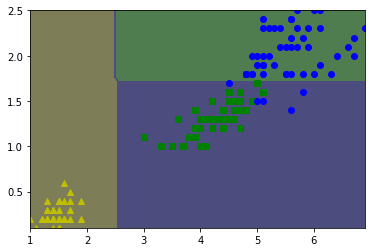

In [102]:
plot_decision_tree_boundaries(tree_clf, X, y)

In [103]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [95]:
tree_clf.predict([[5,1.5]])

array([1])

In [69]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [104]:
from sklearn.datasets import make_regression, make_moons

In [105]:
from pprint import pprint

In [107]:
X,y=make_regression()

In [109]:
pprint(make_regression.__doc__)

('Generate a random regression problem.\n'
 '\n'
 '    The input set can either be well conditioned (by default) or have a low\n'
 '    rank-fat tail singular profile. See :func:`make_low_rank_matrix` for\n'
 '    more details.\n'
 '\n'
 '    The output is generated by applying a (potentially biased) random '
 'linear\n'
 '    regression model with `n_informative` nonzero regressors to the '
 'previously\n'
 '    generated input and some gaussian centered noise with some adjustable\n'
 '    scale.\n'
 '\n'
 '    Read more in the :ref:`User Guide <sample_generators>`.\n'
 '\n'
 '    Parameters\n'
 '    ----------\n'
 '    n_samples : int, optional (default=100)\n'
 '        The number of samples.\n'
 '\n'
 '    n_features : int, optional (default=100)\n'
 '        The number of features.\n'
 '\n'
 '    n_informative : int, optional (default=10)\n'
 '        The number of informative features, i.e., the number of features '
 'used\n'
 '        to build the linear model used to generate t

In [119]:
X,y=make_regression(n_features=3,n_samples=100)

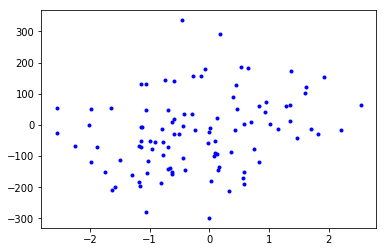

In [122]:
plt.plot(X[:,2],y, 'b.')

In [123]:
X,y=make_moons(noise=0.25)

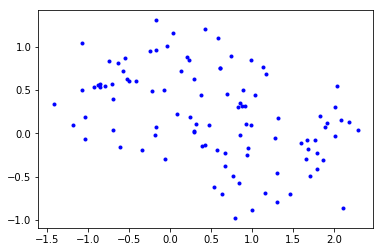

In [125]:
plt.plot(X[:,0], X[:,1],'b.')

In [134]:
def plot_decision_tree_boundaries(model, X, y):
    x0s = np.linspace(X[:,0].min(), X[:,0].max())
    x1s = np.linspace(X[:,1].min(), X[:,1].max())
    x0,x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_new = model.predict(X_new).reshape(x0.shape)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contourf(x0, x1, y_new, cmap= custom_cmap2)
    y0 = X[y==0]
    y1 = X[y==1]

    plt.plot(y0[:,0], y0[:,1], 'y^')
    plt.plot(y1[:,0], y1[:,1], 'k.')

    

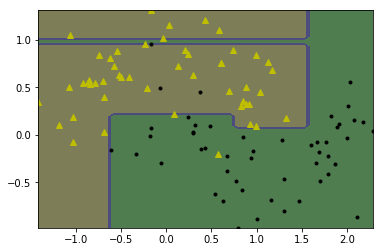

In [141]:
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X,y)

plot_decision_tree_boundaries(tree_clf, X, y)

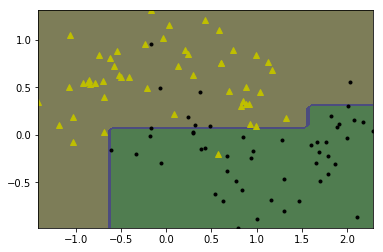

In [142]:
tree_clf = DecisionTreeClassifier(min_samples_leaf=4)

tree_clf.fit(X,y)

plot_decision_tree_boundaries(tree_clf, X, y)

In [195]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [196]:
from sklearn.tree import DecisionTreeRegressor

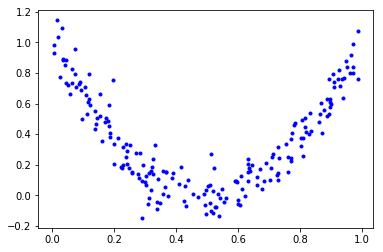

In [197]:
plt.plot(X,y,'b.')

In [198]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)


export_graphviz(tree_reg, out_file=image_path('iris_reg.dot'),
               feature_names=["x1"],
            class_names=['y1'],
            rounded=True,
            filled=True)

!dot -T png ./images/decision_trees/iris_reg.dot -o ./images/decision_trees/iris_reg.png

def plot_decision_tree_regressor_preds(model, X, y):
    X_new = np.linspace(X[:,0].min(), X[:,0].max(),1000).reshape((1000,1))
    y_new = model.predict(X_new)
    
    plt.plot(X_new, y_new, 'r-')
    plt.plot(X, y,'b.')

    

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

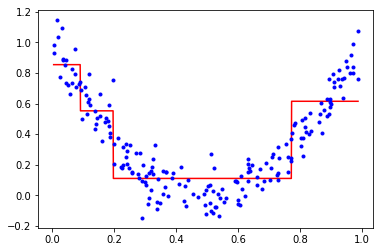

In [203]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)


export_graphviz(tree_reg, out_file=image_path('iris_reg.dot'),
               feature_names=["x1"],
            class_names=['y1'],
            rounded=True,
            filled=True)

!dot -T png ./images/decision_trees/iris_reg.dot -o ./images/decision_trees/iris_reg.png


plot_decision_tree_regressor_preds(tree_reg, X,y)

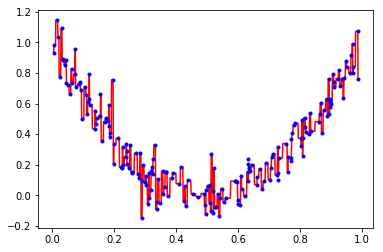

In [204]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X,y)
plot_decision_tree_regressor_preds(tree_reg, X,y)


Text(0.5,1,'min_samples_leaf=10')

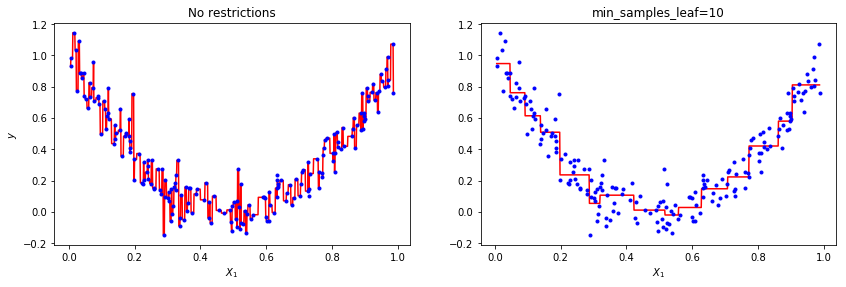

In [215]:
plt.figure(figsize=(14,9))
plt.subplot(221)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X,y)

plot_decision_tree_regressor_preds(tree_reg, X,y)
plt.title('No restrictions')
plt.ylabel('$y$')
plt.xlabel('$X_1$')

plt.subplot(222)


tree_reg = DecisionTreeRegressor(min_samples_leaf=10)
tree_reg.fit(X,y)

plot_decision_tree_regressor_preds(tree_reg, X,y)
plt.xlabel('$X_1$')
plt.title('min_samples_leaf=10')



# Exercise :-

In [220]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [223]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [224]:
tree_clf = DecisionTreeClassifier()
params_distribution = { 'max_leaf_nodes' : [i for i in range(2, 100)] }
grid_search = GridSearchCV(tree_clf, params_distribution, n_jobs=-1, verbose=2, cv=3)

In [225]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] max_leaf_nodes=2 ................................................
[CV] max_leaf_nodes=2 ................................................
[CV] max_leaf_nodes=2 ................................................
[CV] max_leaf_nodes=3 ................................................
[CV] ................................. max_leaf_nodes=2, total=   0.0s
[CV] ................................. max_leaf_nodes=2, total=   0.0s
[CV] ................................. max_leaf_nodes=2, total=   0.0s
[CV] max_leaf_nodes=3 ................................................
[CV] ................................. max_leaf_nodes=3, total=   0.0s
[CV] ................................. max_leaf_nodes=3, total=   0.0s
[CV] max_leaf_nodes=3 ................................................
[CV] max_leaf_nodes=4 ................................................
[CV] ................................. max_leaf_nodes=3, total=   0.0s
[CV] max_leaf_n

[CV] max_leaf_nodes=24 ...............................................
[CV] ................................ max_leaf_nodes=20, total=   0.0s
[CV] max_leaf_nodes=26 ...............................................
[CV] ................................ max_leaf_nodes=22, total=   0.0s
[CV] ................................ max_leaf_nodes=21, total=   0.0s
[CV] max_leaf_nodes=23 ...............................................
[CV] max_leaf_nodes=21 ...............................................
[CV] ................................ max_leaf_nodes=24, total=   0.0s
[CV] max_leaf_nodes=25 ...............................................
[CV] ................................ max_leaf_nodes=26, total=   0.0s
[CV] max_leaf_nodes=27 ...............................................
[CV] ................................ max_leaf_nodes=23, total=   0.0s
[CV] ................................ max_leaf_nodes=25, total=   0.0s
[CV] max_leaf_nodes=23 ...............................................
[CV] m

[CV] max_leaf_nodes=43 ...............................................
[CV] ................................ max_leaf_nodes=41, total=   0.0s
[CV] max_leaf_nodes=41 ...............................................
[CV] ................................ max_leaf_nodes=37, total=   0.0s
[CV] max_leaf_nodes=38 ...............................................
[CV] ................................ max_leaf_nodes=39, total=   0.0s
[CV] max_leaf_nodes=40 ...............................................
[CV] ................................ max_leaf_nodes=41, total=   0.0s
[CV] ................................ max_leaf_nodes=43, total=   0.0s
[CV] ................................ max_leaf_nodes=40, total=   0.0s
[CV] max_leaf_nodes=43 ...............................................
[CV] max_leaf_nodes=40 ...............................................
[CV] ................................ max_leaf_nodes=38, total=   0.0s
[CV] max_leaf_nodes=42 ...............................................
[CV] m

[CV] max_leaf_nodes=58 ...............................................
[CV] ................................ max_leaf_nodes=56, total=   0.0s
[CV] ................................ max_leaf_nodes=58, total=   0.0s
[CV] max_leaf_nodes=62 ...............................................
[CV] max_leaf_nodes=64 ...............................................
[CV] ................................ max_leaf_nodes=60, total=   0.1s
[CV] ................................ max_leaf_nodes=60, total=   0.1s
[CV] max_leaf_nodes=61 ...............................................
[CV] ................................ max_leaf_nodes=64, total=   0.0s
[CV] max_leaf_nodes=60 ...............................................
[CV] max_leaf_nodes=65 ...............................................
[CV] ................................ max_leaf_nodes=62, total=   0.1s
[CV] max_leaf_nodes=63 ...............................................
[CV] ................................ max_leaf_nodes=61, total=   0.0s
[CV] .

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    2.1s


[CV] ................................ max_leaf_nodes=66, total=   0.1s
[CV] ................................ max_leaf_nodes=65, total=   0.1s
[CV] max_leaf_nodes=67 ...............................................
[CV] max_leaf_nodes=65 ...............................................
[CV] ................................ max_leaf_nodes=63, total=   0.0s
[CV] ................................ max_leaf_nodes=61, total=   0.1s
[CV] max_leaf_nodes=63 ...............................................
[CV] max_leaf_nodes=62 ...............................................
[CV] ................................ max_leaf_nodes=65, total=   0.0s
[CV] max_leaf_nodes=66 ...............................................
[CV] ................................ max_leaf_nodes=63, total=   0.0s
[CV] ................................ max_leaf_nodes=67, total=   0.0s
[CV] max_leaf_nodes=64 ...............................................
[CV] max_leaf_nodes=67 ...............................................
[CV] .

[CV] ................................ max_leaf_nodes=80, total=   0.0s
[CV] ................................ max_leaf_nodes=82, total=   0.0s
[CV] max_leaf_nodes=80 ...............................................
[CV] max_leaf_nodes=82 ...............................................
[CV] ................................ max_leaf_nodes=84, total=   0.0s
[CV] max_leaf_nodes=85 ...............................................
[CV] ................................ max_leaf_nodes=83, total=   0.0s
[CV] max_leaf_nodes=84 ...............................................
[CV] ................................ max_leaf_nodes=80, total=   0.0s
[CV] ................................ max_leaf_nodes=82, total=   0.0s
[CV] max_leaf_nodes=86 ...............................................
[CV] ................................ max_leaf_nodes=85, total=   0.0s
[CV] max_leaf_nodes=88 ...............................................
[CV] ................................ max_leaf_nodes=84, total=   0.0s
[CV] m

[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed:    3.8s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [226]:
grid_search.best_params_

{'max_leaf_nodes': 16}

In [227]:
y_preds = grid_search.best_estimator_.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8628

In [228]:
from sklearn.model_selection import ShuffleSplit

In [229]:
splitter = ShuffleSplit(n_splits=1000, train_size = 100)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [232]:
import copy


In [234]:
best_model = grid_search.best_estimator_
scores_list = []

for train_index, test_index in splitter.split(X_train):
        
        new_X_train=X_train[train_index]
        new_y_train=y_train[train_index]
        worker=copy.deepcopy(best_model) 
        tree_model=worker.fit(new_X_train, new_y_train)
        
        y_preds=worker.predict(X_test)
        scores_list.append(accuracy_score(y_test,y_preds))
        
np.mean(np.array(scores_list))

0.8013644

In [236]:
from scipy.stats import mode

In [237]:
a , b = [[1,2], [3,4]]

In [249]:
np.array(mode(np.c_[a,b]))[0].ravel()

array([1, 3])

In [263]:
from sklearn.base import BaseEstimator , TransformerMixin
import copy

class MyRandomForestClassifier(BaseEstimator, TransformerMixin):
    
    def __init__(self, model, n_splits=1000, train_size=100):
        self.model=model
        self.best_model=model
        self.n_splits=n_splits
        self.train_size=train_size
        self.trained_workers = []
        
    def fit(self, X, y=None):
        
        splitter = ShuffleSplit(n_splits=1000, train_size=100)
        
        for train_index, _ in splitter.split(X):
            
            new_X_train=X[train_index]
            new_y_train=y[train_index]
            
            worker=copy.deepcopy(self.best_model) 
            tree_model=worker.fit(new_X_train, new_y_train)
            
            self.trained_workers.append(tree_model)
            
        return self
    
    def predict(self, X, y=None):
        self.scores_list = []
        
        for worker in self.trained_workers:
            preds = worker.predict(X)
            self.scores_list.append(preds)
            
        self.final_preds = mode(np.array(self.scores_list))[0].ravel()
    
        return self.final_preds
        
        

In [264]:
rnd_clf = MyRandomForestClassifier(grid_search.best_estimator_)

In [271]:
rnd_clf.fit(X_train, y_train)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


MyRandomForestClassifier(model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
             n_splits=1000, train_size=100)

In [272]:
final_preds = rnd_clf.predict(X_test)

In [273]:
accuracy_score(y_test, final_preds)

0.8684

##### Let's see how much better is it from normal Decision Tree Classifier

In [274]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_preds = tree_clf.predict(X_test)
accuracy_score(y_test, y_preds)

0.8036